In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv")


In [14]:
patIDs = df_all['PatID'].unique()
rand_pats = np.random.choice(patIDs, 1, replace=False)
df_plot = df_all[df_all['PatID'].isin(rand_pats)]
df_plot['Feature'] = df_plot['Group'] + '_' + df_plot['Feature']

fts = df_plot['Feature'].unique()


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if __name__ == "__main__":
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\UntrackedCode\envPR\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  if sys.path[0] == "":


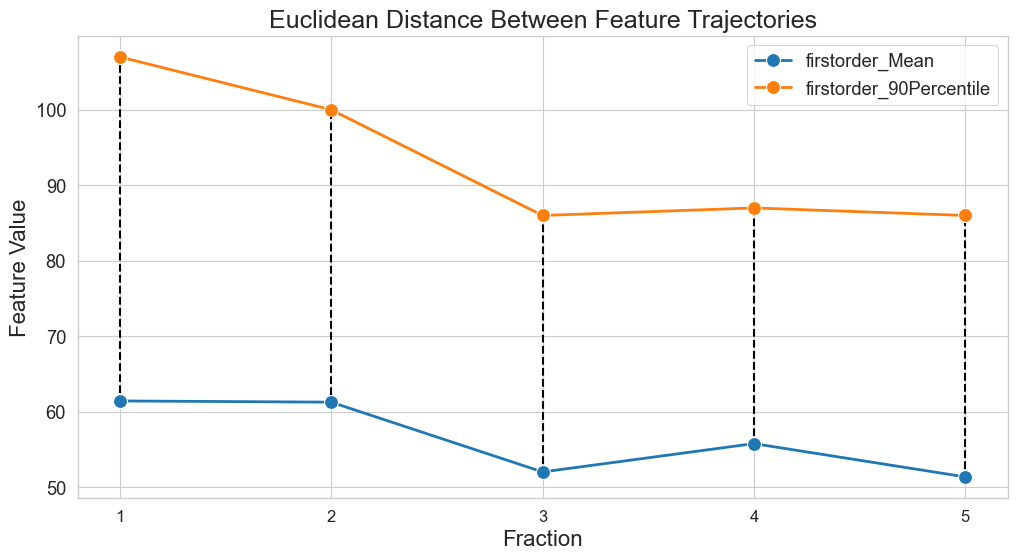

In [87]:
rand_fts = np.random.choice(fts, 2, replace=False)
df_plot = df_plot.loc[df_plot['Feature'].isin(fts)]
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# plot

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, label=rand_fts[0], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[0]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

sns.lineplot(data = df_plot.loc[df_plot['Feature'] == rand_fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, label=rand_fts[1], linewidth=2, legend=True, palette='muted', marker='o', markersize=10)
#sns.scatterplot(data = df_plot.loc[df_plot['Feature'] == fts[1]], x = 'Fraction', y='FeatureValue', ax=ax, s=100, legend=True, palette='muted')

ax.set_xlabel('Fraction', fontsize=16)
ax.set_ylabel('Feature Value', fontsize=16)
ax.set_xticks(np.arange(1, 5.1, 1))
ax.set_xticklabels(np.arange(1, 6, 1), fontsize=12)
ax.set_title('Euclidean Distance Between Feature Trajectories', fontsize=18)

y_vals1 = df_plot.loc[df_plot['Feature'] == rand_fts[0]]['FeatureValue'].values + 1
y_vals2 = df_plot.loc[df_plot['Feature'] == rand_fts[1]]['FeatureValue'].values - 1

for i in range(1, 6):
    ax.vlines(i, y_vals1[i-1], y_vals2[i-1], color='black', linestyle='dashed', linewidth=1.5)

